<a href="https://colab.research.google.com/github/fxnnxc/antisymmetric_weight_analysis/blob/main/anti_symmetric_normal_weight_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* https://keras.io/api/layers/initializers/

In [1]:
import numpy as np

from sklearn.metrics import accuracy_score
from keras.datasets import reuters, mnist
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

import tensorflow as tf
from tensorflow import keras
from keras.layers import RNN
from keras import backend as K

from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Activation
from keras import optimizers
from keras.wrappers.scikit_learn import KerasClassifier


def my_init1(shape, dtype=None):
    return tf.random.normal(shape, dtype=dtype)

def my_init2(shape, dtype=None):
    w = np.random.normal(size=shape)
    w1 = np.triu(w, k=1)
    w2 = w1.T
    ret = w1-w2 + np.ones(shape=shape) * 0.5 
    ret = tf.convert_to_tensor(ret, dtype=dtype)
    return ret

def vanilla_rnn_reuter_init1():
    model = Sequential()
    model.add(SimpleRNN(50, input_shape = (49,1), recurrent_initializer=my_init1))   # return_sequences parameter has to be set True to stack
    model.add(Dense(46))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.0001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model

def vanilla_rnn_reuter_init2():
    model = Sequential()
    model.add(SimpleRNN(50, input_shape = (49,1), recurrent_initializer=my_init2))   # return_sequences parameter has to be set True to stack
    model.add(Dense(46))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.0001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

    return model

def vanilla_rnn_mnist_init1():
    model = Sequential()
    model.add(SimpleRNN(50, input_shape = (28*28,1), recurrent_initializer=my_init1))   # return_sequences parameter has to be set True to stack
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.0001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model

def vanilla_rnn_mnist_init2():
    model = Sequential()
    model.add(SimpleRNN(50, input_shape = (28*28,1), recurrent_initializer=my_init2))   # return_sequences parameter has to be set True to stack
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.0001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

    return model

In [2]:
# parameters for data load
num_words = 30000
maxlen = 50
test_split = 0.3

(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words = num_words, maxlen = maxlen, test_split = test_split)

# pad the sequences with zeros 
# padding parameter is set to 'post' => 0's are appended to end of sequences
X_train = pad_sequences(X_train, padding = 'post')
X_test = pad_sequences(X_test, padding = 'post')

X_train = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = np.array(X_test).reshape((X_test.shape[0], X_test.shape[1], 1))

y_data = np.concatenate((y_train, y_test))
y_data = to_categorical(y_data)

y_train = y_data[:1395]
y_test = y_data[1395:]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

2113536/2110848 [==============================] - 0s 0us/step
(1395, 49, 1)
(599, 49, 1)
(1395, 46)
(599, 46)


In [3]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# Reuter Data

In [4]:
#normal
model = KerasClassifier(build_fn = vanilla_rnn_reuter_init1, epochs = 100, batch_size = 128, verbose = 0)
history1 = model.fit(X_train, y_train, validation_data=(X_test, y_test))
y_pred = model.predict(X_test)
y_test_ = np.argmax(y_test, axis = 1)

# anti symmetric normal
model = KerasClassifier(build_fn = vanilla_rnn_reuter_init2, epochs = 100, batch_size = 128, verbose = 0)
history2 = model.fit(X_train, y_train,validation_data=(X_test, y_test))
y_pred = model.predict(X_test)
y_test_ = np.argmax(y_test, axis = 1)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


# MINIST Data

In [5]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = x_train.reshape((x_train.shape[0],28*28,1))
x_test = x_test.reshape((x_test.shape[0],28*28,1))

y_data = np.concatenate((y_train, y_test))
y_data = to_categorical(y_data)

y_train = y_data[:x_train.shape[0]]
y_test = y_data[x_train.shape[0]:]

x_train.shape, y_train.shape, x_test.shape, y_test.shape

11493376/11490434 [==============================] - 0s 0us/step


((60000, 784, 1), (60000, 10), (10000, 784, 1), (10000, 10))

In [6]:
# normal
model = KerasClassifier(build_fn = vanilla_rnn_mnist_init1, epochs = 100, batch_size = 512, verbose = 0)
history3 = model.fit(x_train, y_train,  validation_data=(x_test, y_test))
y_pred = model.predict(x_test)

# anti symmetric normal
model = KerasClassifier(build_fn = vanilla_rnn_mnist_init2, epochs = 100, batch_size = 512, verbose =0)
history4 = model.fit(x_train, y_train,  validation_data=(x_test, y_test))
y_pred = model.predict(x_test)

# Loss 

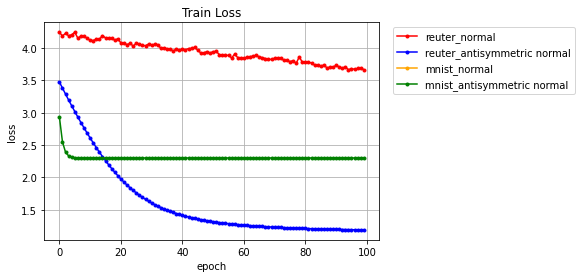

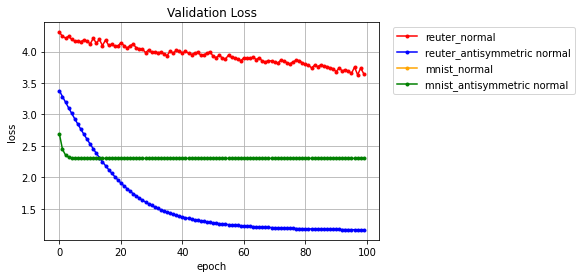

In [8]:
import matplotlib.pyplot as plt

y_loss_1 = history1.history['loss']
y_loss_2 = history2.history['loss']
y_loss_3 = history3.history['loss']
y_loss_4 = history4.history['loss']

x_len = np.arange(len(y_loss_1))
plt.plot(x_len, y_loss_1, marker='.', c='red', label="reuter_normal")
plt.plot(x_len, y_loss_2, marker='.', c='blue', label="reuter_antisymmetric normal")
plt.plot(x_len, y_loss_3, marker='.', c='orange', label="mnist_normal")
plt.plot(x_len, y_loss_4, marker='.', c='green', label="mnist_antisymmetric normal")

plt.legend(loc='upper right', bbox_to_anchor=(1.6, 1))
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title("Train Loss")

plt.figure()

y_loss_1 = history1.history['val_loss']
y_loss_2 = history2.history['val_loss']
y_loss_3 = history3.history['val_loss']
y_loss_4 = history4.history['val_loss']

x_len = np.arange(len(y_loss_1))
plt.plot(x_len, y_loss_1, marker='.', c='red', label="reuter_normal")
plt.plot(x_len, y_loss_2, marker='.', c='blue', label="reuter_antisymmetric normal")
plt.plot(x_len, y_loss_3, marker='.', c='orange', label="mnist_normal")
plt.plot(x_len, y_loss_4, marker='.', c='green', label="mnist_antisymmetric normal")
plt.legend(loc='upper right', bbox_to_anchor=(1.6, 1))
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title("Validation Loss")
plt.show()

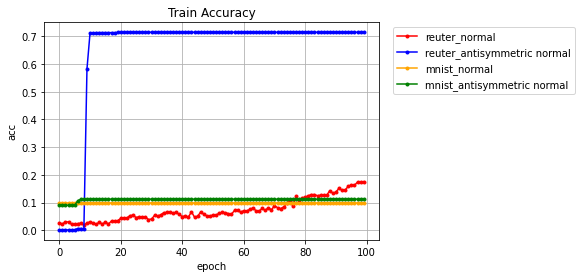

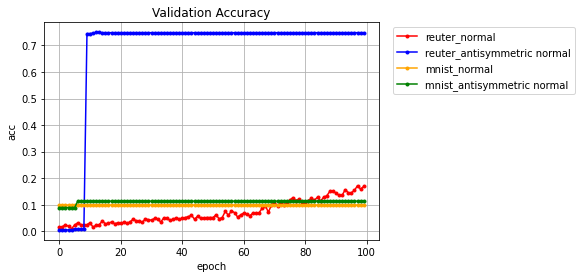

In [9]:
import matplotlib.pyplot as plt

y_loss_1 = history1.history['accuracy']
y_loss_2 = history2.history['accuracy']
y_loss_3 = history3.history['accuracy']
y_loss_4 = history4.history['accuracy']

x_len = np.arange(len(y_loss_1))
plt.plot(x_len, y_loss_1, marker='.', c='red', label="reuter_normal")
plt.plot(x_len, y_loss_2, marker='.', c='blue', label="reuter_antisymmetric normal")
plt.plot(x_len, y_loss_3, marker='.', c='orange', label="mnist_normal")
plt.plot(x_len, y_loss_4, marker='.', c='green', label="mnist_antisymmetric normal")

plt.legend(loc='upper right', bbox_to_anchor=(1.6, 1))
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.title("Train Accuracy")

plt.figure()

y_loss_1 = history1.history['val_accuracy']
y_loss_2 = history2.history['val_accuracy']
y_loss_3 = history3.history['val_accuracy']
y_loss_4 = history4.history['val_accuracy']

x_len = np.arange(len(y_loss_1))
plt.plot(x_len, y_loss_1, marker='.', c='red', label="reuter_normal")
plt.plot(x_len, y_loss_2, marker='.', c='blue', label="reuter_antisymmetric normal")
plt.plot(x_len, y_loss_3, marker='.', c='orange', label="mnist_normal")
plt.plot(x_len, y_loss_4, marker='.', c='green', label="mnist_antisymmetric normal")
plt.legend(loc='upper right', bbox_to_anchor=(1.6, 1))
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.title("Validation Accuracy")
plt.show()